In [8]:
import cv2
import numpy as np

def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    #rect0 = (rect[0], rect[1], angle) 
    box = cv2.boxPoints(rect)
    
   
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]
    
    #box = np.int0(box)
    #cv2.drawContours(img_rot, [pts], 0, (255,0,255), 2)
    
    return img_crop

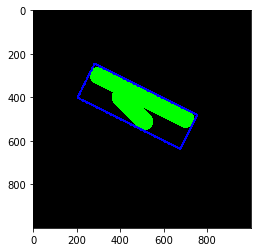

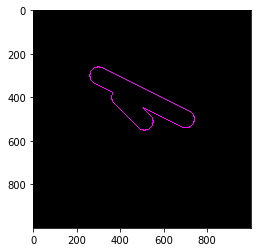

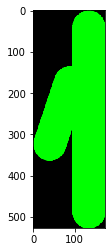

In [9]:
# generate image
img = np.zeros((1000,1000,3), np.uint8)
black=img.copy()
img = cv2.line(img,(400,400),(511,511),(0,255,0),80)
img = cv2.line(img,(300,300),(700,500),(0,255,0),80)


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# find contours / rectangle
_,contours,_ = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rect = cv2.minAreaRect(contours[0])

# crop
img_croped = crop_minAreaRect(img, rect)
cv2.drawContours(black, contours[0], -3, (255,0,255), 3)

box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img, [box], 0, (0,0,255),10)
    
# show
import matplotlib.pylab as plt
plt.figure(figsize=(4,4))
#plt.subplot(1,3,1)
plt.imshow(img)
#plt.subplot(1,3,2)
plt.figure(figsize=(4,4))
plt.imshow(black)
plt.figure(figsize=(4,4))
plt.imshow(img_croped)
plt.show()